# SIT742: Modern Data Science 
**(Module 04: Exploratory Data Analysis)**


---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)

Prepared by **SIT742 Teaching Team**

---



# Session 4D - Association Rule Mining

## Apriori Algorithm for Association Rule Mining

Association Rule Learning is a prominent area of Data Mining.
From a given transcation dataset, the goal is to find a pattern among different items in transactions.
This means investigating, to what extent does purchasing a item A leads to purchasing item B. On one hand,
it helps the customer finding the items associated with eahc in a store. On the other hand, salesperson can
use this information and place associated items together to escalate sales. <br/>
One way for Association Rule Learning is Apriori Algorithm.
Apriori algorithm uses 2 concepts from Association Rule Mining: <br/>
    -Support <br/>
    -Confidence

We will briefly discuss the two below.

### Support

For a transaction dataset T, Support is the proportion of the transactions that contain both the item A and B. <br/>
Support (AB) = P(A $ \cup $ B)

### Confidence

For a transaction dataset T, Confidence is the percentage of transactions in T, containing A and that also contain B. In other words, this is the probability of B in T given that A is already in that transaction. <br/> Confidence (A $ \rightarrow $ B) = P(B | A)

## Apiori Algorithm

Apiori Algorithm is a Association Rule learning Algorithm and is used to find frequent itemsets and relevant association rules. By frequent itemsets we should think of items who are frequently associated with each other within the whole dataset. In order for a frequent itemset to be valid the subsets of the itemset needs to be frequent by themselves, this is called anti-monotonicity or downward-closure poperty. The anti-monotonicity guarantees a efficient search, this is necessary because the algorithm goes through all combinations adding one at a time. The process of adding one at a time is called buttom up approach.

### `apyori` Package

In this part, we will use the `apyori` package. 

Here we assume a simple transaction set, and then the calling of `apriori` is straightforward:

In [ ]:
!pip install apriori

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

transactions = [
    ['beer', 'nuts'],
    ['beer', 'cheese'],
]

rules = apriori(transactions)

# rules = apriori(transactions, min_support = 0.5, min_confidence = 0.7, min_length = 2)


results = list(rules)

In [ ]:
print(results)

In [ ]:
for i in range(len(results)):
    print("##############################################################################")
    print(i)
    print(results[i])
    print(results[i].items)

## Transactions from File

If the transaction set is stored on an external file, we might need to use some code to load it into the proper format:

Consider a file with the following content:

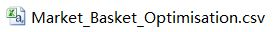
When importing our dataset `Market_Basket_Optimization`, we should add the `header` argument with the value `None`, without this Python places the first row of the dataset as the titles of the columns and we do not want this. If we take a look at the dataframe now we can see that our product names are now located in the first row. 




In [ ]:
!pip install wget

In [ ]:
import wget

link_to_data = 'https://github.com/tuliplab/mds/raw/master/Jupyter/data/Market_Basket_Optimisation.csv'
DataSet = wget.download(link_to_data)

In [ ]:
import pandas as pd

# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
dataset

The next thing is that we will preprocess our data set by placing it in Lists of Lists, we do this using two for loops. The first for loop goes through all the rows (transactions) of the dataset and the second for loop goes through all the products and adds these to a list before appending them to the transactions list. We can see that our dataset is now of the type list and that it's value is indeed a list of products. 

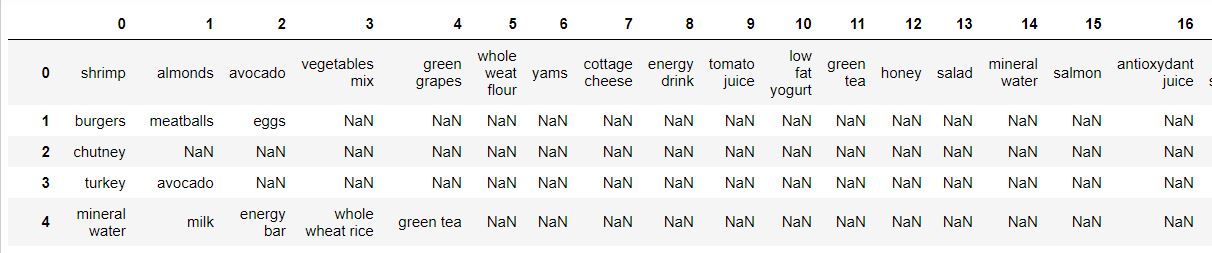


We will not go into details of this code because there are various ways to get to the same result with Python, just note that the second for loop is actually a inner for loop, nested in the append method. 

Also note that the `dataset.values[i,j]` is converted to a string value when appended to the transaction list.

In [ ]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])
print(transactions)

Before we train our apriori algorithm on the dataset, let's import the apyori.py library which contains the classes we will be using. We will declare a variable called rules since the apriori algorithm takes the transactions list as input and outputs association rules. If we inspect our Apiori function we see it accepts one main argument and that is an iterable object our transactions list. We can also specify the support, confidence and lift thresholds. A new argument which we have not discussed yet is min_lenght, it specify's the minimum length of our rules, we will set this to 2 to prevent rules with only one item.

When deciding on the minimum support we should calculate this in a way that it makes sense according to the problem at hand. We want to optimize the sales for a supermarket, the dataset contains all the transactions made in one week. If we want to have products who are minimally bought 3 times a day our minimum support will be 0.0028. (3*7/7500)

The minimum confidence should prevent that rules are made based on the wrong reasons, there are products who are bought frequently together not because they're strongly associated but because they are frequently bought products independent of each other. We want our rules to be relevant, choosing 0.8 is to high and will give us no results on this dataset, 0.4 will give us irrelevant rules as described earlier, the winner is 0.2 because this confidence minimum gave us relevant rules that were proven true enough times but not too frequent to be irrelevant to our goal. This minimum is found by running the Apriori algorithm different times and checking if the results makes sense. 

The lift measurement is a good indication of the relevance of our rules, we will set our minimum lift to 3 because we can be sure that these rules will be significant. Remember that these arguments depends on your dataset or problem. The Apriori is an experimental algorithm, we need to try different threshold and see if the produced rules have the wanted effect in the real world if not than we have to tune our thresholds some more.

In [ ]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# Visualising the results
results = list(rules)

myResults = [list(x) for x in results] 


In [ ]:
print(myResults)

In [ ]:
for i in range(len(results)):
    print("##############################################################################")
    print(i)
    print(results[i])
    print(results[i].items)

### Limitations
As you can see the Apriori algorithm is way more efficient than the naive approach because it generates less candidates to test. However, multiple passes through the database are necessary which is not optimal. And particularly the **second pass is computationally intensive** because the set of candidates to test is the longest. This means that for each transaction, each candidate in the set need to be tested.... The second algorithm we will cover tries to address this problem specifically.

## FP-Tree
This algorithm tries to store the frequent itemsets more efficiently. The retrieval of those is also reimagined. I made a python implementation of this interesting algorithm. You can check it here: __[Python implementation](https://github.com/DamDRAIME/DM---Frequent-Pattern-Trees)__

The basic workflow of the FP-growth algorithm is divided into two steps ：**1. Build the FP tree**，The original data set needs to be scanned twice, the first pass counts the number of occurrences of all element items, and the second pass only considers those frequent elements；**2. Mining frequent itemsets.** 

##### Compared with Apriori:
The FP-growth algorithm only needs to scan the database twice, while the Apriori algorithm scans the data set for each potential frequent item set to determine whether a given pattern is frequent. Therefore, the FP-growth algorithm is faster than the Apriori algorithm.

### Create the data structure of the FP tree

#### FP-tree class definition

In [ ]:
class treeNode:
    def __init__(self, nameValue, numOccur, parentNode):
        self.name = nameValue#node name
        self.count = numOccur#count of nodes
        self.nodeLink = None #link similar items
        self.parent = parentNode#refer to parent of the node
        self.children = {}#children of the node

    def inc(self,numOccur):
        self.count += numOccur#increments the count

    def disp(self, ind = 1):
        print('  ' * ind, self.name, ' ', self.count)
        for child in self.children.values():#for debugging
            #ind += 1
            child.disp(ind + 1)
            #print("count:%d" % (ind+1))


In [ ]:
rootNode = treeNode('pyramid',9,None)
rootNode.disp()

In [ ]:
rootNode.children['eye'] = treeNode('eye',13,None)
rootNode.children['phoenix'] = treeNode('phoenix',3,None)
rootNode.children['phoe'] = treeNode('phoe',23,None)
rootNode.disp()

#### Build FP tree

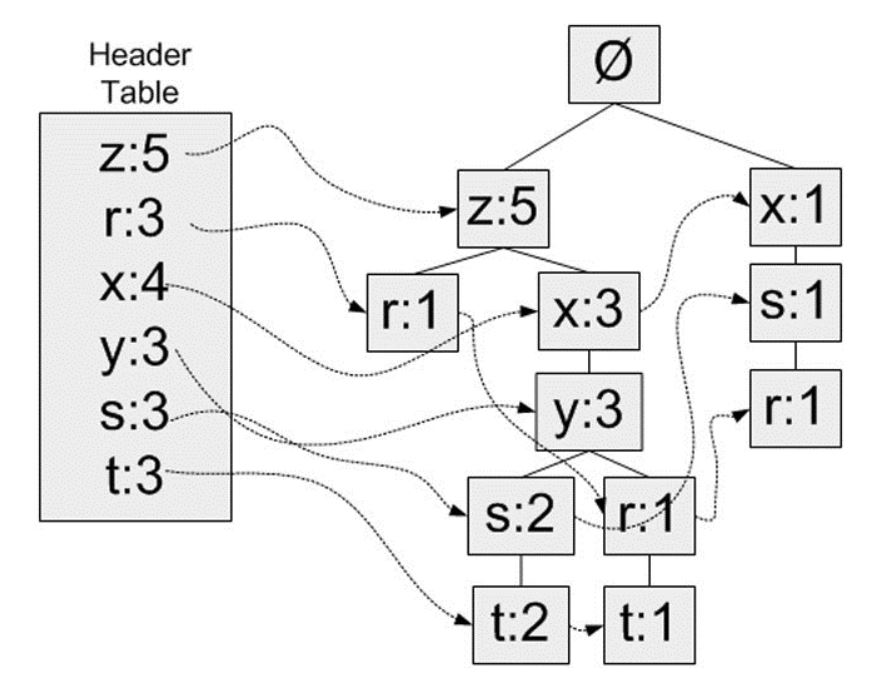

Head pointer schematic

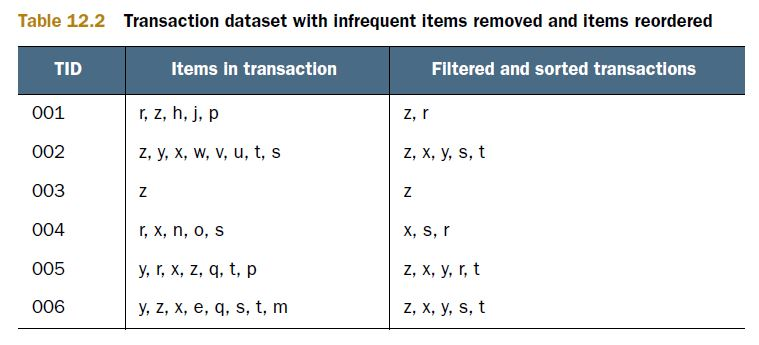

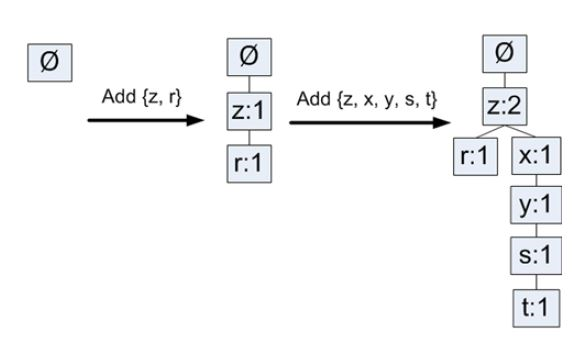

The first two steps of constructing FP tree using table12-2 data

#### FP-tree creation code

In [ ]:
#FP-tree
def createTree(dataSet, minSup = 1):
	headerTable = {}
	for trans in dataSet:
		for item in trans:
			headerTable[item] = headerTable.get(item, 0) + dataSet[trans]

	for k in list(headerTable.keys()):#remove items not meeting min support
		if headerTable[k] < minSup:
			del(headerTable[k])

	freqItemSet = set(headerTable.keys())
	if len(freqItemSet) == 0:#if no items meet min support,exit
		return None,None
	for k in headerTable:
		headerTable[k] = [headerTable[k], None]
	retTree = treeNode('Null Set', 1, None)
	for tranSet, count in dataSet.items():
		localD = {}
		for item in tranSet:#sort transactions by global frequency
			if item in freqItemSet:
				localD[item] = headerTable[item][0]
		if len(localD) > 0:
			orderedItems = [v[0] for v in sorted(localD.items(),key = lambda p:p[1], reverse = True)]
			updateTree(orderedItems, retTree, headerTable,count)#populate tree with ordered freq itemset
	return retTree, headerTable

def updateTree(items, inTree, headerTable, count):
	if items[0] in inTree.children:#exist
		inTree.children[items[0]].inc(count)
	else:#doesn't exist, create a new treeNode and adds it as a child
		inTree.children[items[0]] = treeNode(items[0], count, inTree)
		if headerTable[items[0]][1] == None:
			headerTable[items[0]][1] = inTree.children[items[0]]
		else:
			updateHeader(headerTable[items[0]][1], inTree.children[items[0]])
	if len(items) > 1:#recursively call updateTree on remaining items
		updateTree(items[1::],inTree.children[items[0]],headerTable,count)

def updateHeader(nodeToTest, targetNode):#nodeLink, linked list
	while(nodeToTest.nodeLink != None):
		nodeToTest = nodeToTest.nodeLink
	nodeToTest.nodeLink = targetNode


#### Simple Dataset and Wrapper

In [ ]:
def loadSimpDat():
	simpDat = [['r','z','h','j','p'],
				['z','y','x','w','v','u','t','s'],
				['z'],
				['r','x','n','o','s'],
				['y','r','x','z','q','t','p'],
				['y','z','x','e','q','s','t','m']]
	return simpDat

def createInitSet(dataSet):
	retDict = {}
	for trans in dataSet:
		retDict[frozenset(trans)] = 1
	return retDict

In [ ]:
simpDat = loadSimpDat()
simpDat

In [ ]:
initSet = createInitSet(simpDat)
initSet

In [ ]:
myFPtree, myHeaderTab = createTree(initSet,3)
myFPtree.disp()

## PCY
The **Park-Chen-Yu algorithm**, also called PCY algorithm, addresses one of the limitations of the Apriori algorithm. It tries to limit the computationnal resources needed for the second pass through the database. This is done via hashing.
### Observation
During the first pass of the Apriori algorithm through the database, most of the memory is idle. We could use the rest to help shorten the list of itemsets of size 2 that we will have to check during the second pass. We could achieve this by **hashing** pairs (i.e. itemsets of size 2), we encouter in each transaction, to buckets. Each time a pair hashes to a bucket, we increment this bucket's count of 1. Note that it is not the same as counting occurrences of each pair for two reasons:
1. because there might be collisions (i.e. two different pairs hashing to the same buckets);
2. because we don't remember which pair hashes to which bucket.

Then, given the "count" of each bucket, we can filter more aggressively the list of candidates of size 2 in the Pruning Step. Indeed, if a candidate pair does not hash to a bucket that has a "count" greater than, or equal to the support threshold, then this pair won't be frequent as well. However keep in mind that even with this additionnal filter, we might still have candidates that are not frequent hence we still need to pass through the database once more to filter these out. But we will have to check less pairs in the second pass, which is the more computationally intensive one.<br>
Let's illustrate these last points:

In [ ]:
def join(freq_itemsets):
    k = len(freq_itemsets[0]) + 1
    new_candidates = []
    if k == 2:
        for i, itemseti in enumerate(freq_itemsets[:-1]):
            for itemsetj in freq_itemsets[i+1:]:
                new_candidates.append(tuple(itemseti + itemsetj))
    else:
        for i, itemseti in enumerate(freq_itemsets[:-1]):
            for itemsetj in freq_itemsets[i+1:]:
                *itemseti_first, itemseti_last = itemseti
                *itemsetj_first, itemsetj_last = itemsetj
                if itemseti_first == itemsetj_first:
                    new_candidates.append(tuple(itemseti_first + [itemseti_last] + [itemsetj_last]))
    return new_candidates

In [ ]:
def hashfunction(itemset, num_buckets):
    return sum([ord(element) for element in str(itemset)]) % num_buckets

In [ ]:
pairs = [[1,4], [1,5], [2,3]]
for pair in pairs:
    print('The pair {} hashes to bucket #{}'.format(pair, hashfunction(pair, 3)))

In this toy example, we only requested a hash function that created 3 buckets. It is then obvious that multiple pairs will hash to the same bucket and thus collide, as it is the case for pairs \[1, 4\], and \[2, 3\]. Hence if multiple pairs which individually are not frequent hash to the same bucket, inflating its "count" to the point where it's greater than the support threshold then we would have to check all those pairs in the second pass to discover that they are not frequent. Hence, it is important that the hash function reduces collisions as much as possible by evenly distributing pairs among the buckets. On the other hand, we don't want too many buckets because we don't want our hash table to take too much space in memory. Furthermore, to save space, this hash table will be saved as a bitmap. This is illustrated below:

In [ ]:
def hashtable(candidates):
    hashtbl = {}
    num_buckets = 11  # Arbitrary choice, could be adjusted dynamically
    for candidate in candidates:
        hashvalue = hashfunction(candidate, num_buckets)
        hashtbl[hashvalue] = hashtbl.get(hashvalue, 0) + 1
    return hashtbl

In [ ]:
def bitmap(hashtable, num_buckets, support_threshold):
    return [1 if hashtable.get(i, 0) >= support_threshold else 0 for i in range(num_buckets)]

In [ ]:
def first_pass_and_hash(database_file, support_threshold):
    raw_count = {}
    pairs = []
    with open(database_file) as database:
        for transaction in database:
            transaction = set(transaction[:-1].split(','))  # Creating a set to avoid counting multiple times a duplicated item from a basket
            for itemset in transaction:
                itemset = (itemset,)
                raw_count[itemset] = raw_count.get(itemset, 0) + 1
            for i, itemseti in enumerate(list(transaction)[:-1]):
                for itemsetj in list(transaction)[i+1:]:
                    pairs.append(tuple([itemseti] + [itemsetj]))
            bitmap_hashtable = bitmap(hashtable(pairs), 11, support_threshold)

    return raw_count, bitmap_hashtable

In [ ]:
import wget

link_to_data =  'https://github.com/tulip-lab/sit742/raw/master/Jupyter/data/Generic_Transactions_db.txt'
DataSet = wget.download(link_to_data)


database_file = '/content/Generic_Transactions_db.txt'  # Feel free to try the different databases from the dataset folder
raw_count, bitmap_hashtable = first_pass_and_hash(database_file, 2)
print('Raw count of itemsets of size 1:\n{}\n\nBitmap:\n{}'.format(raw_count, bitmap_hashtable))

*Note that python has a hash function already implemented. The one used here is to showcase the fact that even if the hash function produces collisions, the algorithm will still work*

### Implementation
We now have everything to implement this PCY algorithm. Just bear in mind that:
- this hashing trick is only used between the first and second passes but not on subsequent passes;
- the bitmap of the hash table is used in the Prune Step
- for a pair \[$i$, $j$\] to remain in the set of candidates for the second pass:
    - both $i$ and $j$ need to be frequent
    - the pair \[$i$, $j$\] needs to hash to a bucket with "count" $\geq$ support threshold

In [ ]:
def prune(candidates, freq_itemsets, bitmap):
    kept_candidates = []
    for candidate in candidates:
        if bitmap is None or bitmap[hashfunction(candidate, 11)] == 1:
            for i in range(len(candidate) - 2):
                subset = candidate[:i] + candidate[i + 1 :]
                if subset not in freq_itemsets:
                    break
            else:
                kept_candidates.append(candidate)
    return kept_candidates

In [ ]:
def pcy(database_file, support_threshold):
    raw_count, bitmap = first_pass_and_hash(database_file, support_threshold)
    first_pass = True
    candidates = raw_count.keys()
    vault_freq_itemsets = []
    
    while len(candidates) > 0:
        freq_itemsets = []
        
        if not first_pass:
            with open(database_file) as database:
                for transaction in database:
                    transaction = set(transaction[:-1].split(','))  # Creating a set to avoid counting multiple times a duplicated item from a basket
                    for candidate in candidates:
                        if set(candidate).issubset(transaction):
                            raw_count[candidate] = raw_count.get(candidate, 0) + 1
        
        freq_itemsets = [itemset for itemset, support in raw_count.items() if support >= support_threshold]
        vault_freq_itemsets.append(freq_itemsets)
                            
        candidates = join(freq_itemsets)
        
        candidates = prune(candidates, freq_itemsets, bitmap)
        
        if first_pass:
            first_pass = False
            bitmap = None
        raw_count = {}
        
    return vault_freq_itemsets

In [ ]:
frequent_itemsets = pcy(database_file, 2)
for size, frequent_itemset in enumerate(frequent_itemsets):
    print('Frequent itemsets of size {}:\n{}'.format(size+1, frequent_itemset),end='\n\n')

### Limitations
It is important to notice that the PCY algorithm is an extension to the Apriori algorithm. It partially addresses one of the issues of the Apriori algorithm, more specifically the heavy workload necessary to find frequent itemsets of size 2. This bottleneck of the Apriori algorithm is minimized by cleverly using a hashing technique. This technique provides a new filter that is used at the end of the first pass to reduce the size of the set of candidate pairs that will have to be checked during the second pass.<br>
Note however that the efficiency of this technique depends heavily on the hash function. In the extreme case where all pairs are hashed to the same bucket, the PCY extension does not provide any help since it won't filter out any candidates.<br>
This PCY algorithm does not propose any solution to the fact that we still have to go through the database multiple times to find frequent itemsets of increasing size.

## Other approaches
Let's now turn our attention to other algorithms/extensions. We will briefly introduce them and refer you to other sources to get more information.
### Multihash algorithm
In the continuity of the PCY algorithm, this one proposes to hash, during the first pass, all pairs but **multiple times with different hash functions**. This is done in the hope that even if two different unfrequent pairs hash to the same bucket, with the first hash function, such that they both have to be kept as candidates because the bucket's "count" $\geq$ support threshold, the second hash function will hash them to different buckets, thus increasing the chance that they will be filtered out. One might then want to use many hash functions but due to the limited size of the memory, more hash functions means that each one will have a restricted space. Thus the more hash functions you have, the less buckets each of them will be able to have, increasing then the chance of collisions. There is thus clearly a tradeoff to be made.<br><br>
Source to go further: __[Mining of Massive Datasets](http://www.mmds.org/)__
### Toivonen's algorithm
This algorithm attempts to limit the number of passes needed to find frequent items. In the best case scenario, this algorithm will only need two passes through the database to find all frequent itemsets (of any size $s$). However, this comes with a cost: the algorithm is not guaranteed to return a result at each run. Hence it might be necessary to rerun it multiple times. During it's first pass, Toivonen's algorithm will use a sample of the database and find all frequent itemsets that are in it, according to a lowered support threshold (set according to the sample's size). Next to those frequent itemsets, the algorithm also constructs a list called **Negative Border** which contains all itemsets not deemed frequent in the sample but for which all its immediate subsets are. During the second pass, the algorithm uses the full database and checks which of the frequent itemsets from the sample are also frequent in the database. Moreover, during this last pass, it checks that none of the itemsets from the Negative Border is frequent in the database. If this is the case, then the algorithm has to be rerun because it might be that one frequent itemset has not been discovered. In the other case, the algorithm returns the list of frequent itemsets.<br><br>
Source to go further: __[Mining of Massive Datasets](http://www.mmds.org/)__


## Conclusion
We have seen multiple approaches that can be used to mine frequent itemsets from a database of transactions.<br>
The extensions that we have covered, such as the hashing technique, and the sampling of the database, are neat tricks that can often be used in other contexts and scenario. This is why it is often useful to keep in mind tricks that helped speed up algorithms in other areas because they can often be applied to algorithms from other fields. 